In [7]:
import datetime as dt
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:

dataset = pd.read_csv(r'C:\Users\Ajay\Desktop\NoteMachine\creditcard.csv')

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


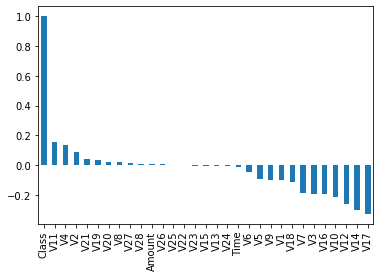

In [8]:

dataset.corr()['Class'].sort_values(ascending=False).plot.bar()

In [18]:
# To find the linear relationship between v17 and v11
X = dataset['V11'].values
Y = dataset['V17'].values

In [19]:
# To find the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer+=(X[i] - mean_x)*(Y[i] - mean_y)
    denom+=(X[i] - mean_x)**2
b1 =numer/denom
b0 = mean_y -(b1*mean_x)

print(b1, b0)
    

7.062711756766929e-13 -6.425411761367246e-13


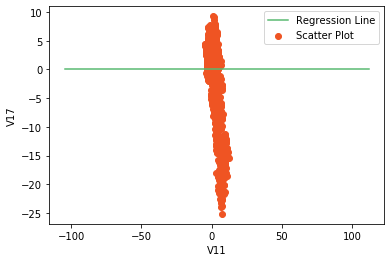

In [20]:
#Let plot the values and the regression Lines

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#ploting Scatter points
plt.plot(x,y, color= '#58b970', label = 'Regression Line')
#ploting scatter points
plt.scatter(X, Y, c='#ef5423', label= 'Scatter Plot')

plt.xlabel('V11')
plt.ylabel('V17')
plt.legend()
plt.show()


In [22]:
ss_t =0
ss_r=0
for i in range(m):
    y_pred = b0 + b1* X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 -(ss_r/ss_t)
print(r2)

-1.5543122344752192e-15


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X= X.reshape((m,1))

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)

r2_score = reg.score(X, Y)
print(r2_score)

-2.220446049250313e-16
